In [146]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
# Iterate over files and find csv files 
dfs = []

for filename in os.listdir(os.path.abspath(os.getcwd())):
    if filename.endswith(".csv"): 
        participant_id = int(re.search(r'\d+', filename).group())
        temp = pd.read_csv(filename)
        temp["scene"] = temp["scene"].str[-1:]
        temp["scene"] = temp["scene"].astype('int')
        temp["participant"] = participant_id
        nvc = "A"
        if int(participant_id) % 2 == 0:
            nvc = "B"
    
        temp["NVC"] = nvc
        dfs.append(temp)


raw_data = pd.concat(dfs, axis=0, ignore_index=True)

In [148]:
raw_data.head()

,scene,robot_a,robot_b,participant,NVC
0,0,0,1,1,A
1,1,1,1,1,A
2,2,3,2,1,A
3,3,3,3,1,A
4,4,3,3,1,A


In [149]:
# Only from scene 2 to 4
filtered_data = raw_data[raw_data["scene"] > 1]
filtered_data.head()

,scene,robot_a,robot_b,participant,NVC
2,2,3,2,1,A
3,3,3,3,1,A
4,4,3,3,1,A
7,2,3,4,10,B
8,3,4,3,10,B


In [150]:
# Find the total amount of cubes that participants allocated
cubes_per_participant = filtered_data.groupby("participant").sum()
cubes_per_participant = cubes_per_participant.drop(columns=['scene'])
cubes_per_participant['total_cubes'] = cubes_per_participant['robot_a'] + cubes_per_participant['robot_b'] 
cubes_per_participant.head()

,robot_a,robot_b,total_cubes
participant,,,
1,9,8,17
2,6,7,13
3,11,9,20
4,7,7,14
5,7,11,18


([<matplotlib.axis.XTick at 0x7f37f2a51320>,
 <a list of 10 Text xticklabel objects>)

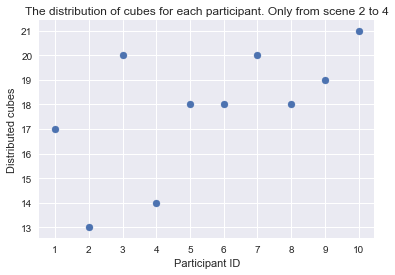

In [151]:
plt.scatter(cubes_per_participant.index, cubes_per_participant["total_cubes"], label="participant")
plt.title("The distribution of cubes for each participant. Only from scene 2 to 4")
plt.xlabel("Participant ID")
plt.ylabel("Distributed cubes")
plt.xticks(range(1, len(dfs) + 1))

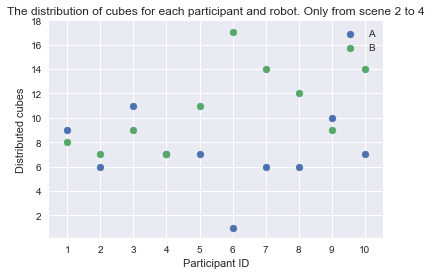

In [152]:
plt.scatter(cubes_per_participant.index, cubes_per_participant["robot_a"], label="A")
plt.scatter(cubes_per_participant.index, cubes_per_participant["robot_b"], label="B")
plt.title("The distribution of cubes for each participant and robot. Only from scene 2 to 4")
plt.xlabel("Participant ID")
plt.ylabel("Distributed cubes")
plt.xticks(range(1, len(dfs) + 1))
plt.legend()

In [153]:
scene2_data = raw_data[raw_data["scene"] == 2]
scene2_data

,scene,robot_a,robot_b,participant,NVC
2,2,3,2,1,A
7,2,3,4,10,B
12,2,2,2,2,B
17,2,3,3,3,A
22,2,2,2,4,B
27,2,1,3,5,A
32,2,1,3,6,B
37,2,2,4,7,A
42,2,0,7,8,B
47,2,4,2,9,A


In [154]:
# Only scene 2 data merged with total number of cubes
cubes_per_participant = cubes_per_participant.reset_index()
eval_data = pd.merge(scene2_data, cubes_per_participant, on='participant')
eval_data = eval_data.drop(columns=['robot_a_y', 'robot_b_y'])
eval_data

,scene,robot_a_x,robot_b_x,participant,NVC,total_cubes
0,2,3,2,1,A,17
1,2,3,4,10,B,21
2,2,2,2,2,B,13
3,2,3,3,3,A,20
4,2,2,2,4,B,14
5,2,1,3,5,A,18
6,2,1,3,6,B,18
7,2,2,4,7,A,20
8,2,0,7,8,B,18
9,2,4,2,9,A,19


In [155]:
# Only scene 2 data merged with total number of cubes. Extended with NVC or non-NVC.
eval_data['robot_a_significance'] = eval_data['robot_a_x'] / eval_data['total_cubes'] 
eval_data['robot_b_significance'] = eval_data['robot_b_x'] / eval_data['total_cubes']
eval_data['NVC_A'] = eval_data['NVC'] == "A"
eval_data['NVC_B'] = eval_data['NVC'] == "B"

eval_data

,scene,robot_a_x,robot_b_x,participant,NVC,total_cubes,robot_a_significance,robot_b_significance,NVC_A,NVC_B
0,2,3,2,1,A,17,0.176471,0.117647,True,False
1,2,3,4,10,B,21,0.142857,0.190476,False,True
2,2,2,2,2,B,13,0.153846,0.153846,False,True
3,2,3,3,3,A,20,0.150000,0.150000,True,False
4,2,2,2,4,B,14,0.142857,0.142857,False,True
5,2,1,3,5,A,18,0.055556,0.166667,True,False
6,2,1,3,6,B,18,0.055556,0.166667,False,True
7,2,2,4,7,A,20,0.100000,0.200000,True,False
8,2,0,7,8,B,18,0.000000,0.388889,False,True
9,2,4,2,9,A,19,0.210526,0.105263,True,False


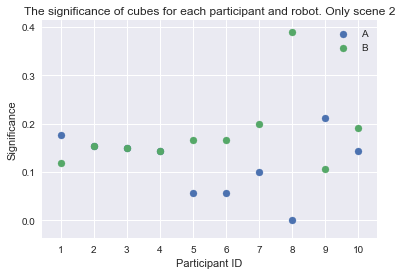

In [156]:
plt.scatter(eval_data["participant"], eval_data["robot_a_significance"], label="A")
plt.scatter(eval_data["participant"], eval_data["robot_b_significance"], label="B")
plt.title("The significance of cubes for each participant and robot. Only scene 2")
plt.xlabel("Participant ID")
plt.ylabel("Significance")
plt.xticks(range(1, len(dfs) + 1))
plt.legend()

Text(0.5,1,'Robot preference values: red is NVC, and blue is non-NVC')

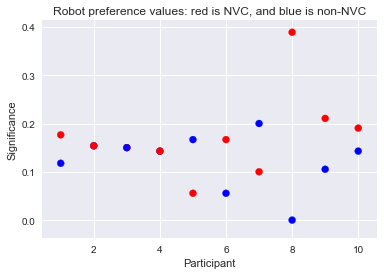

In [157]:
fig, ax = plt.subplots()

colors = {True:'red', False:'blue'}
ax.scatter(eval_data['participant'], eval_data['robot_a_significance'], label=eval_data['NVC_A'], c=eval_data['NVC_A'].apply(lambda x: colors[x]))
ax.scatter(eval_data['participant'], eval_data['robot_b_significance'], label=eval_data['NVC_B'], c=eval_data['NVC_B'].apply(lambda x: colors[x]))
ax.set_xlabel("Participant")
ax.set_ylabel("Significance")

ax.set_title("Robot preference values: red is NVC, and blue is non-NVC")